#### Load Important Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')

#### Reading the Data

In [17]:
# File paths
class_file = 'CLASS.xlsx'
data_file = 'death_population_final_combined.xlsx'

# Read the files
class_df = pd.read_excel(class_file)
data_df = pd.read_excel(data_file)

# Displaying the first few rows of each dataframe to understand the structure
class_df.head()


,Economy,Code,Region,Income group,Lending category
0,Aruba,ABW,Latin America & Caribbean,High income,NaN
1,Afghanistan,AFG,South Asia,Low income,IDA
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD
3,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD
4,Andorra,AND,Europe & Central Asia,High income,NaN


In [18]:
data_df.head()

,year,country,total_deaths,no_injured,total_damage_000_usd,total_damage_adjusted_000_usd,country_code,population
0,2001,Afghanistan,485.0,20.0,10.0,17.0,AFG,19688632.0
1,2002,Afghanistan,4083.0,1391.0,0.0,0.0,AFG,21000256.0
2,2003,Afghanistan,137.0,4.0,0.0,0.0,AFG,22645130.0
3,2004,Afghanistan,18.0,40.0,0.0,0.0,AFG,23553551.0
4,2005,Afghanistan,570.0,44.0,5050.0,7568.0,AFG,24411191.0


In [19]:
# Merging the data on the country code to combine income group information with the yearly data
income_merged_df = pd.merge(data_df, class_df[['Code', 'Income group']], left_on='country_code', right_on='Code', how='left')

# Calculating the mortality rate per 100,000 people for each year and country
income_merged_df['mortality_rate'] = (income_merged_df['total_deaths'] / income_merged_df['population']) * 1e6

# Grouping the data by income group and year to create an income-wise dataset
income_yearly_df = income_merged_df.groupby(['Income group', 'year']).agg(
    total_deaths=pd.NamedAgg(column='total_deaths', aggfunc='sum'),
    total_population=pd.NamedAgg(column='population', aggfunc='sum'),
).reset_index()

# Calculating the mortality rate per 100,000 people for each income group and year
income_yearly_df['mortality_rate'] = (income_yearly_df['total_deaths'] / income_yearly_df['total_population']) * 1e6

income_yearly_df.head()

,Income group,year,total_deaths,total_population,mortality_rate
0,High income,2001,822.0,1.084684e+09,0.757825
1,High income,2002,1132.0,1.091345e+09,1.037252
2,High income,2003,73153.0,1.098036e+09,66.621707
3,High income,2004,675.0,1.104935e+09,0.610895
4,High income,2005,3248.0,1.112178e+09,2.920396


In [20]:
income_yearly_df.isna().sum()

Income group        0
year                0
total_deaths        0
total_population    0
mortality_rate      0
dtype: int64

In [21]:
# Getting the unique income groups
income_groups = income_yearly_df['Income group'].dropna().unique()

In [22]:
# Filter the data for Afghanistan
selected_group = 'High income'
group = income_yearly_df[income_yearly_df['Income group'] == selected_group]

group.tail()

,Income group,year,total_deaths,total_population,mortality_rate
18,High income,2019,3716.0,1.210313e+09,3.070279
19,High income,2020,7196.0,1.215343e+09,5.920961
20,High income,2021,1987.0,1.214993e+09,1.635401
21,High income,2022,60187.0,1.218911e+09,49.377673
22,High income,2023,463.0,1.219975e+09,0.379516


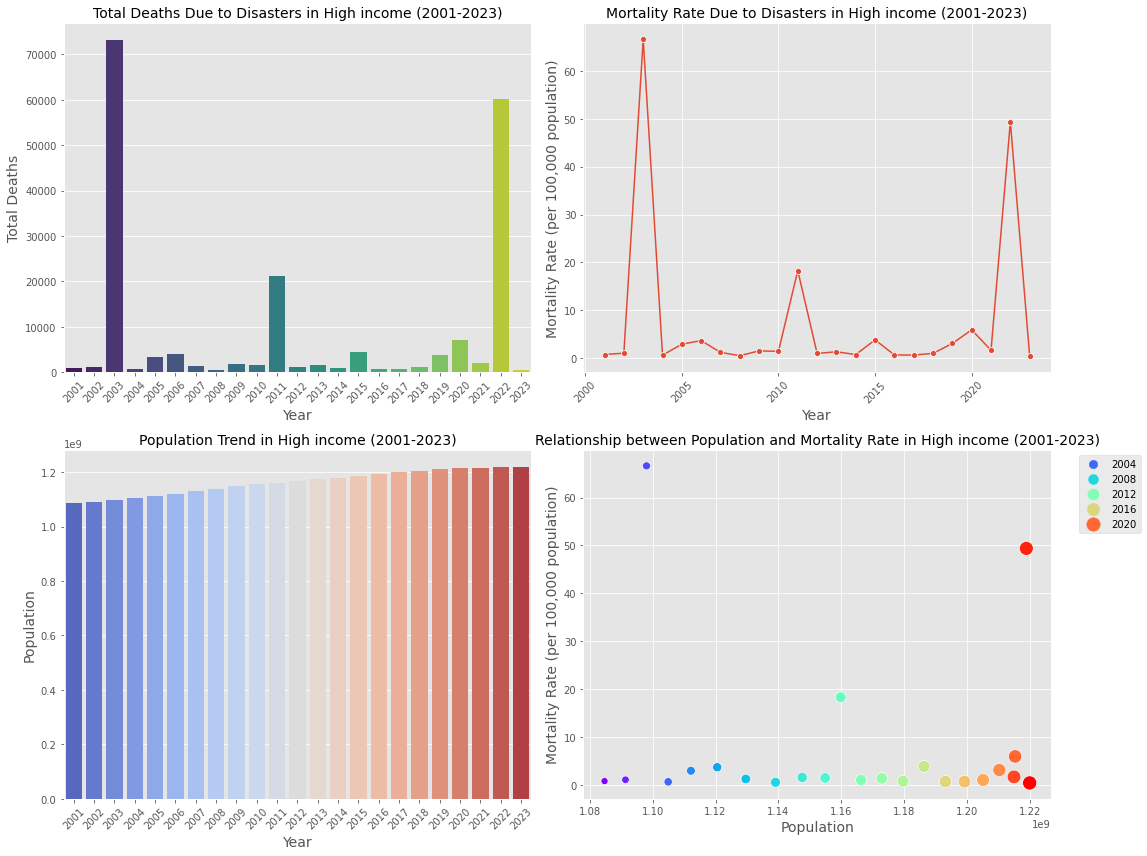

In [23]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Bar plot to visualize total deaths each year
sns.barplot(data=group, x='year', y='total_deaths', palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title(f'Total Deaths Due to Disasters in {selected_group} (2001-2023)', fontsize = 14)
axs[0, 0].set_xlabel('Year', fontsize = 14)
axs[0, 0].set_ylabel('Total Deaths', fontsize = 14)
axs[0, 0].tick_params(axis='x', rotation=45)

# 2. Line plot for mortality rate over the years
sns.lineplot(data=group, x='year', y='mortality_rate', marker='o', ax=axs[0, 1])
axs[0, 1].set_title(f'Mortality Rate Due to Disasters in {selected_group} (2001-2023)', fontsize = 14)
axs[0, 1].set_xlabel('Year', fontsize = 14)
axs[0, 1].set_ylabel('Mortality Rate (per 100,000 population)', fontsize = 14)
axs[0, 1].tick_params(axis='x', rotation=45)

# 3. Bar plot to show the population trend over the years
sns.barplot(data=group, x='year', y='total_population', palette='coolwarm', ax=axs[1, 0])
axs[1, 0].set_title(f'Population Trend in {selected_group} (2001-2023)', fontsize = 14)
axs[1, 0].set_xlabel('Year', fontsize = 14)
axs[1, 0].set_ylabel('Population', fontsize = 14)
axs[1, 0].tick_params(axis='x', rotation=45)

# 4. Scatter plot to visualize the relationship between the population and the mortality rate
sns.scatterplot(data=group, x='total_population', y='mortality_rate', hue='year', palette='rainbow', size='year', sizes=(50, 200), ax=axs[1, 1])
axs[1, 1].set_title(f'Relationship between Population and Mortality Rate in {selected_group} (2001-2023)', fontsize = 14)
axs[1, 1].set_xlabel('Population', fontsize = 14)
axs[1, 1].set_ylabel('Mortality Rate (per 100,000 population)', fontsize = 14)
axs[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout
plt.tight_layout()
plt.show()


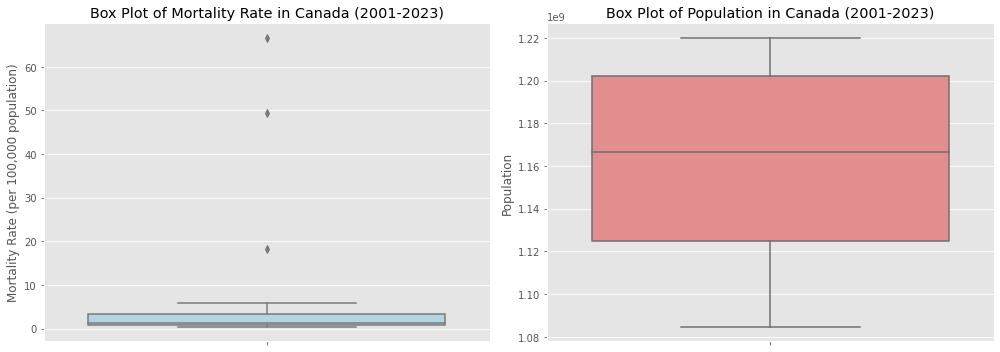

In [24]:
# Setting up the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# 1. Box plot for mortality rate
sns.boxplot(y=group['mortality_rate'], ax=ax[0], color='lightblue')
ax[0].set_title('Box Plot of Mortality Rate in Canada (2001-2023)')
ax[0].set_ylabel('Mortality Rate (per 100,000 population)')

# 3. Box plot for population
sns.boxplot(y=group['total_population'], ax=ax[1], color='lightcoral')
ax[1].set_title('Box Plot of Population in Canada (2001-2023)')
ax[1].set_ylabel('Population')

plt.tight_layout()
plt.show()

In [25]:
# Data preparation for Prophet
#pip install prophet-1.1.5-py3-none-win_amd64.whl
from prophet import Prophet
prophet_data = group[['year', 'mortality_rate']]
prophet_data.columns = ['ds', 'y']

# Convert year into proper datetime format
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'].astype(str) + '-12-31')
prophet_data['y'] = prophet_data['y']

# # Calculate the median for the entire dataset

overall_median = prophet_data['y'].median()

# Replace values in 'y' with this median
prophet_data.loc[prophet_data['ds'].dt.year == 2022, 'y'] = overall_median
prophet_data

,ds,y
0,2001-12-31,0.757825
1,2002-12-31,1.037252
2,2003-12-31,66.621707
3,2004-12-31,0.610895
4,2005-12-31,2.920396
5,2006-12-31,3.658974
6,2007-12-31,1.204801
7,2008-12-31,0.514444
8,2009-12-31,1.518823
9,2010-12-31,1.419198


For Prophet:
The data is structured in a DataFrame with two columns:

ds: Represents the date (timestamp) set to the end of each year.

y: The mortality rate to be forecasted.

Now, let's move on to the Prophet forecasting:

In [26]:
# Assume `df` is your original full dataset, and 'ds' is your datetime column
split_date = '2018-12-31'  # This is an example split date
train_df = prophet_data[prophet_data['ds'] <= split_date]
test_df = prophet_data[prophet_data['ds'] > split_date]

# Define disasters as holidays
disasters = pd.DataFrame({
    'holiday': 'disaster',
    'ds': pd.to_datetime(['2003-12-31', '2011-12-31']),
    'lower_window': 0,
    'upper_window': 0,
})

# Initialize the Prophet model with additional parameters
model = Prophet(
    interval_width=0.95,
    growth='linear',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    holidays=disasters,
    seasonality_mode='multiplicative',
    #seasonality_mode='additive',
    changepoint_prior_scale=0.2,
    seasonality_prior_scale=160,
    #holidays_prior_scale=160,
    mcmc_samples=0
)

# Add a custom yearly seasonality
#model.add_seasonality(name='yearly', period=365.25, fourier_order=20)
# Now, you can fit your model on the training dataset
model.fit(train_df)

# And use the model to make predictions, then compare with the test dataset
future_dates = model.make_future_dataframe(periods=len(test_df), freq='Y')
forecast = model.predict(future_dates)

12:00:49 - cmdstanpy - INFO - Chain [1] start processing
12:00:49 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error

# Ensure that the 'ds' column in forecast and test_df are aligned and that both have the same length
forecasted_values = forecast.set_index('ds').loc[test_df['ds']]['yhat']
actual_values = test_df.set_index('ds')['y']

# Calculate MAE
mae = mean_absolute_error(actual_values, forecasted_values)
print(f"The MAE of the forecast is: {mae}")

# Calculate RMSE
# rmse = np.sqrt(mean_squared_error(actual_values, forecasted_values))
# print(f"The RMSE of the forecast is: {rmse}")

# # Calculate MAPE
# mape = mean_absolute_percentage_error(actual_values, forecasted_values)
# print(f"The MAPE of the forecast is: {mape}")
print(forecasted_values)
print(actual_values)

The MAE of the forecast is: 1.7257707202363008
ds
2019-12-31    1.564275
2020-12-31    0.478731
2021-12-31    0.965006
2022-12-31    1.222886
2023-12-31    1.280090
Name: yhat, dtype: float64
ds
2019-12-31    3.070279
2020-12-31    5.920961
2021-12-31    1.635401
2022-12-31    1.332536
2023-12-31    0.379516
Name: y, dtype: float64


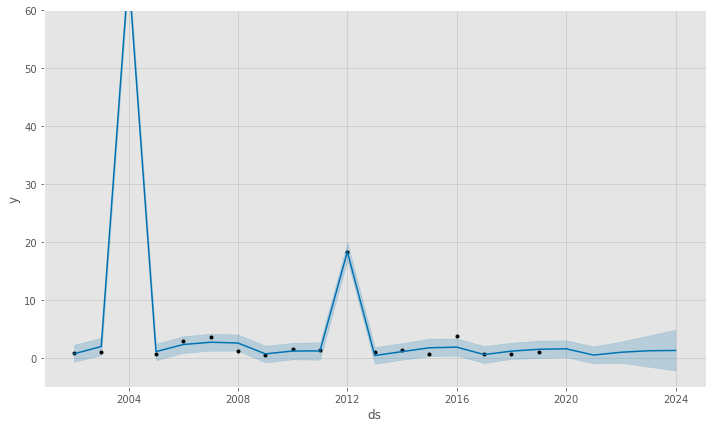

In [28]:
# changepoint_prior_scale=2
# Forecasting for 2023 to 2025
future_dates = model.make_future_dataframe(periods=5, freq='Y')
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
ax = fig.gca()
ax.set_ylim(-5, 60)
#from prophet.plot import add_changepoints_to_plot
#a = add_changepoints_to_plot(fig.gca(), model, forecast)

plt.show()

In [29]:
# Print the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6))

           ds      yhat  yhat_lower  yhat_upper
17 2018-12-31  1.480106   -0.038603    2.972228
18 2019-12-31  1.564275    0.120676    3.032784
19 2020-12-31  0.478731   -0.959622    1.989138
20 2021-12-31  0.965006   -0.844645    2.803430
21 2022-12-31  1.222886   -1.534832    3.836209
22 2023-12-31  1.280090   -2.171864    4.861818


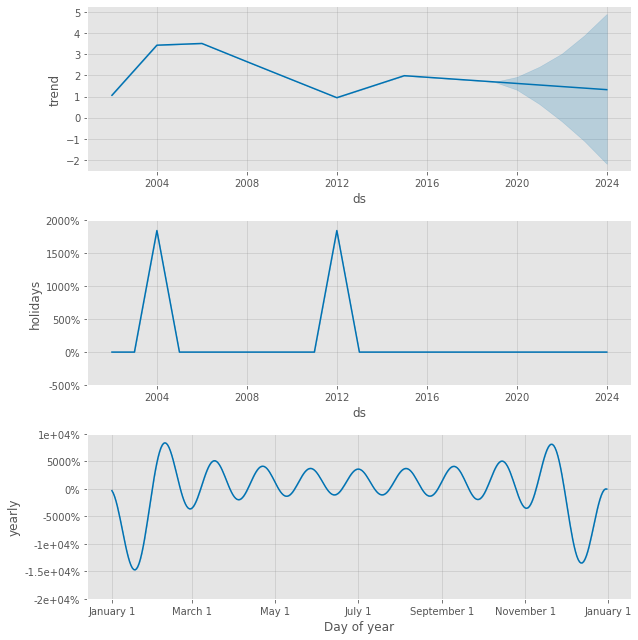

In [30]:
# Displaying components of the forecast
fig2 = model.plot_components(forecast)